In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

import sys
sys.path.append("../")
import GSHEWaveform
    
    
%load_ext autoreload
%autoreload 2

import healpy as hp

In [2]:
def spherical_to_shadow(psi, rho):
    k2 = np.sin(psi)*np.sin(rho)
    k3 = -np.cos(psi)
    return k2, k3

In [3]:
eps = np.load("../results/shadow/loss_eps.npy")
Xgeo = np.load("../results/shadow/loss_Xgeo.npy")
Xgshe = np.load("../results/shadow/loss_Xgshe.npy")
Zloss = np.load("../results/shadow/loss.npy")
k2 = -np.load("../results/shadow/loss_k2.npy")
k3 = np.load("../results/shadow/loss_k3.npy")

X, Y = np.meshgrid(k2, k3)
Zloss = Zloss.reshape(X.shape)

<IPython.core.display.Javascript object>


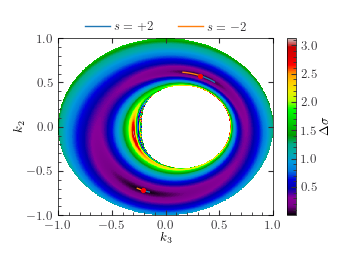

In [10]:
GSHEWaveform.setmplstyle("../plot_style.txt")


cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
polardict = {0: "+2", 1: "-2"}

plt.figure()
plt.pcolormesh(X, -Y, Zloss, cmap="nipy_spectral", shading="auto", label=None, rasterized=True, zorder=0)
plt.colorbar(label=r"$\Delta \sigma$")


for n in range(2):
    for s in range(2):
        if n == 0:
            label = r"$s = {}$".format(polardict[s])
        else:
            label = None
        plt.plot(*spherical_to_shadow(Xgshe[n, s, :, 0], Xgshe[n, s, :, 1])[::-1], c=cycle[s], label=label, zorder=1)

for n in range(2):
    plt.scatter(*spherical_to_shadow(Xgeo[:, 0], Xgeo[:, 1])[::-1], s=7, c="red", zorder=2)


plt.xlabel(r"$k_3$")
plt.ylabel(r"$k_2$")
plt.legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.155))

plt.tight_layout()
plt.savefig("/Users/richard/Downloads/shadow.pdf", dpi=450, bbox_inches="tight")

plt.show()